Exercises from https://ds.codeup.com/python/intro-to-seaborn/

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

## Part 1

Using the iris dataset for this part

In [2]:
iris = sns.load_dataset('iris')

1. What does the distribution of petal lengths look like?

Text(0.5, 1.0, 'Petal Length Distribution')

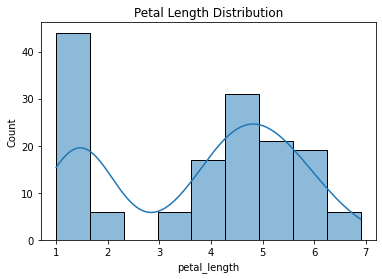

In [10]:
sns.histplot(iris.petal_length, kde=True)
plt.title("Petal Length Distribution")

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

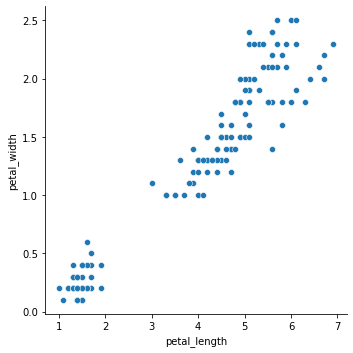

In [13]:
sns.relplot(data = iris, x='petal_length', y='petal_width')

There appears to be a linear correlation between petal length and petal width based on the scatter plot

In [18]:
iris[['petal_length','petal_width']].corr()

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


Correlation values show there is a strong correlation between petal length and petal width

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

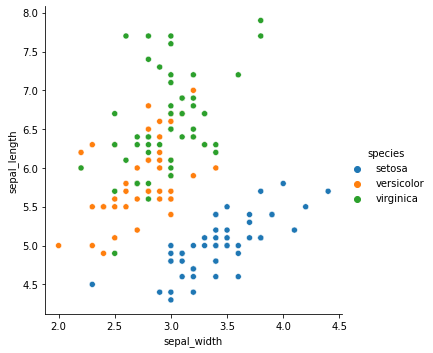

In [27]:
# Visualizing data points by hue
sns.relplot(x = 'sepal_width', y = 'sepal_length', data = iris, hue = 'species')

Based on the scatter plot above it looks like predicting setosa species is reasonable but the other two species have a lot of overlapping data points, which would make it challenging to distinguish between the two of them.

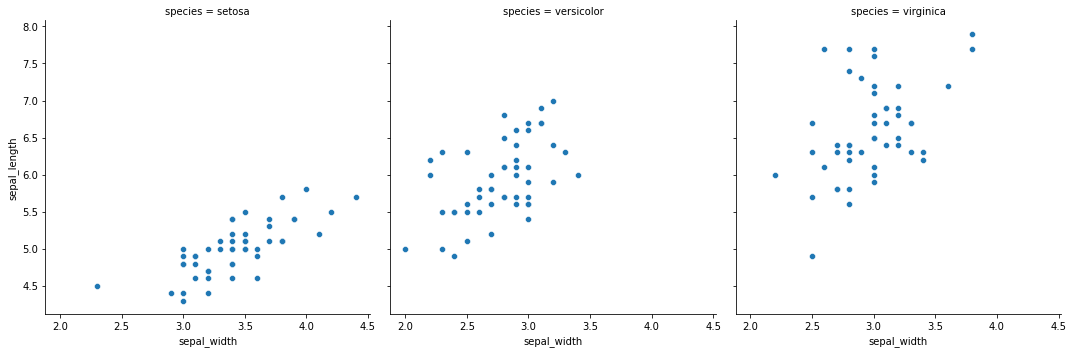

In [30]:
# Visualizing by separating our species
sns.relplot(x = 'sepal_width', y = 'sepal_length', data = iris, col = 'species')

Looking at the species on their individual plots shows a generally linear relationship between the two parameters but doesn't add much to what the overlapping scatter plot showed.

Which features would be best used to predict species?

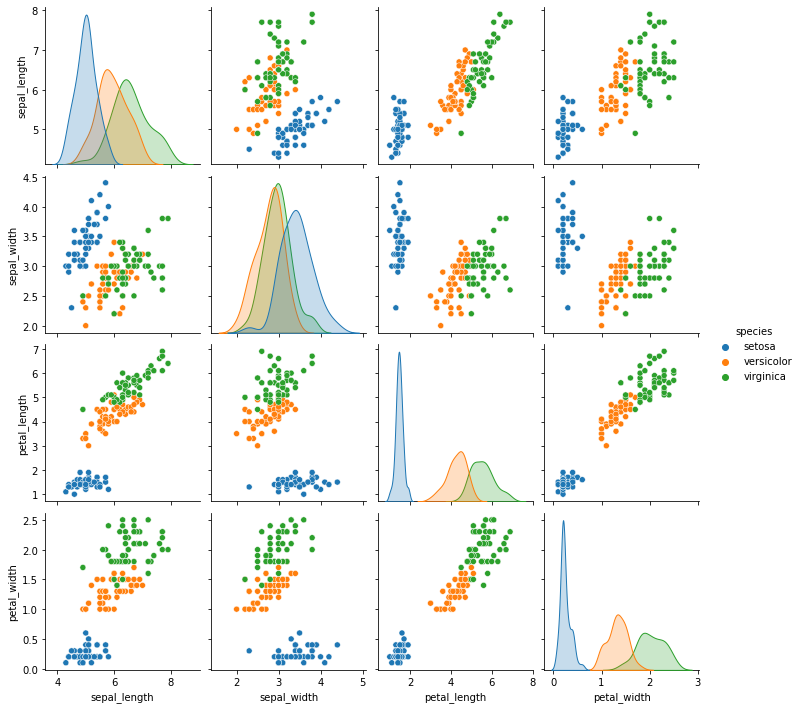

In [32]:
sns.pairplot(data = iris, hue = 'species')

Based on the pairplot it appears petal length and petal width would be good features for predicting species as plotted against each other there are definite, distinct clusters for each species. Sepal length vs petal width or petal length may be used for predicting species as well.

## Part 2

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [35]:
df = sns.load_dataset('anscombe')

In [42]:
df.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

Based on the descriptive statistics shown for each dataset the following aspects are apparent:

-each dataset has same quantity of x and y values (11)

-The mean and std of x are equivalent for every dataset

-The mean and std of y are very similar for all datasets

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

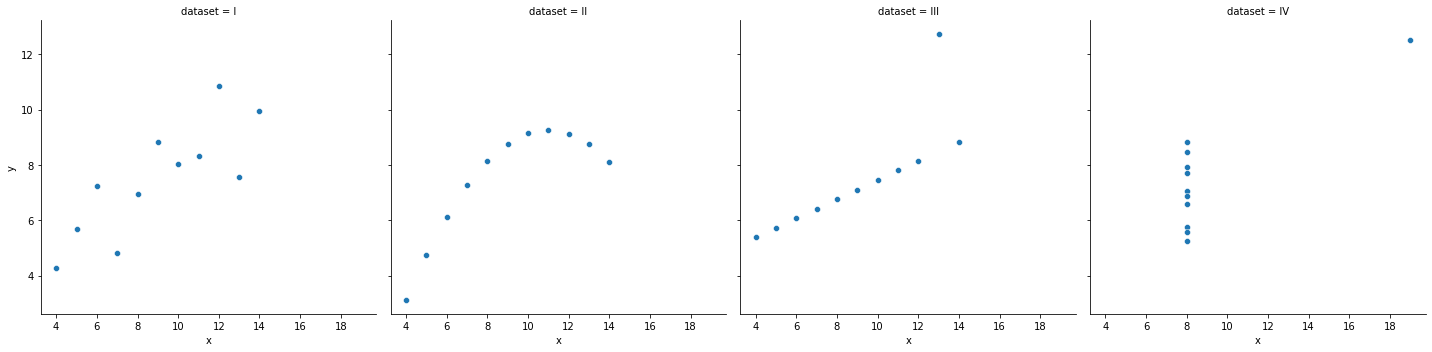

In [44]:
sns.relplot(x = 'x',y = 'y', data = df, col = 'dataset')

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [49]:
insect = data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [54]:
insect = data('InsectSprays')
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

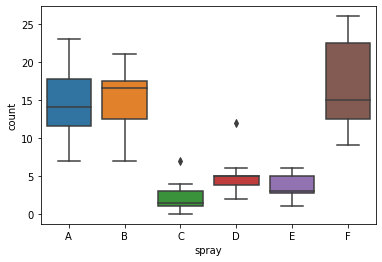

In [60]:
sns.boxplot(data = insect, y = 'count', x = 'spray')

Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [61]:
swiss = data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [62]:
swiss = data('swiss')

3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [64]:
swiss['is_catholic'] = swiss.Catholic > 50

In [70]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


3b. Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

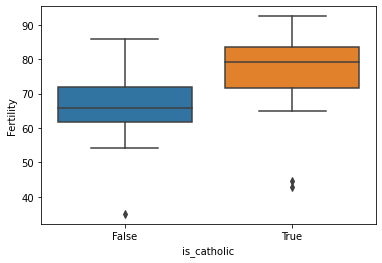

In [69]:
sns.boxplot(data = swiss, y = 'Fertility', x = 'is_catholic')

The box plot shows that the fertility does seem to be greater in Catholic provinces

3c. What measure correlates most strongly with fertility?

In [ ]:
Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [ ]:
Load the sleepstudy data and read it's documentation. 

In [ ]:
Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.